In [18]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [19]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/equilibration/"
print("data path: ", data_path)

level: level2 & tutorial name: nanosheared-electrolyte
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/nanosheared-electrolyte/equilibration/


In [20]:
time, distance = np.loadtxt(data_path + "interwall_distance.dat").T
time /= 1000 # ps
distance /= 10 # nm

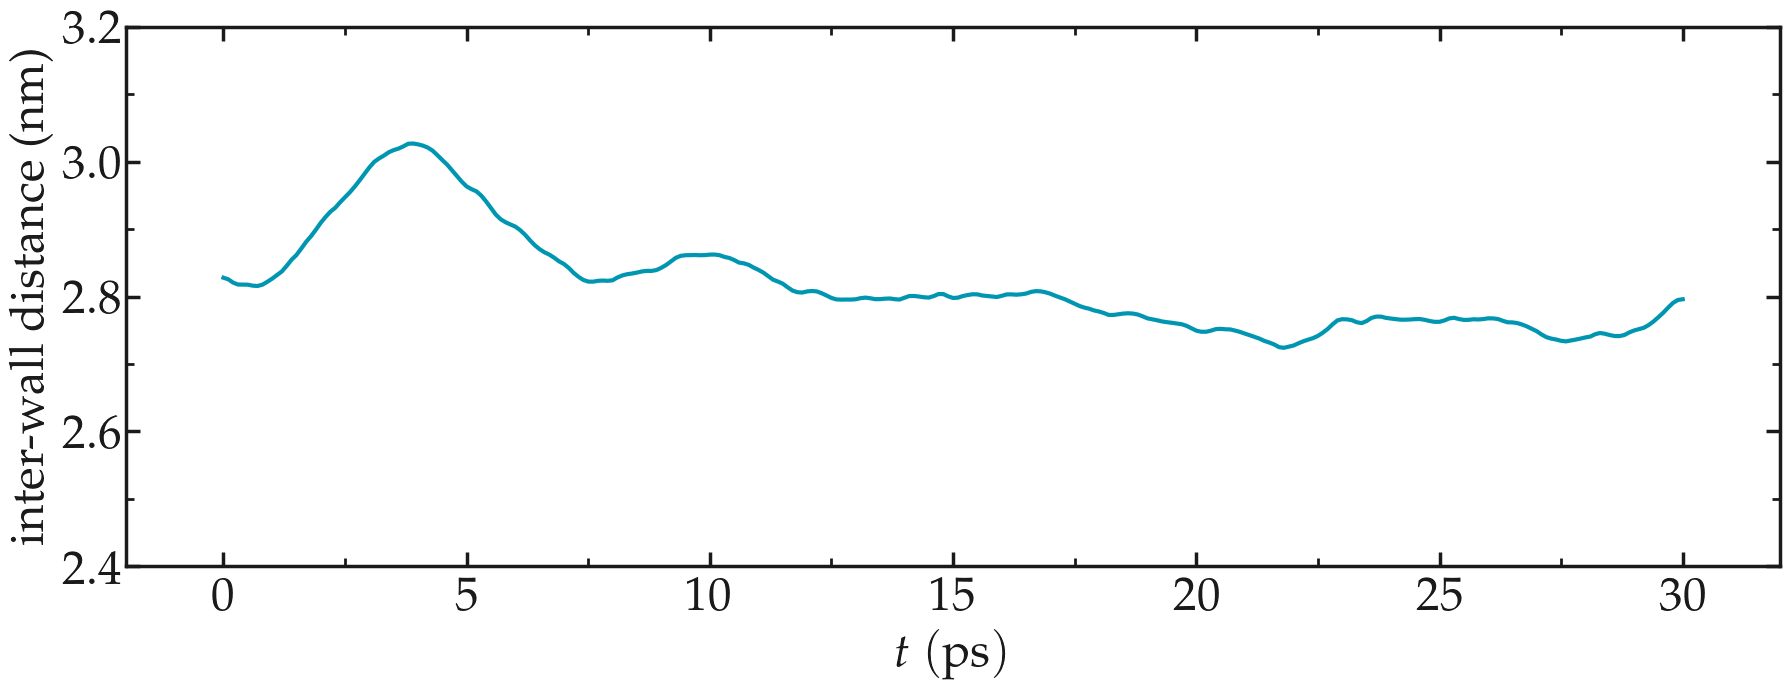

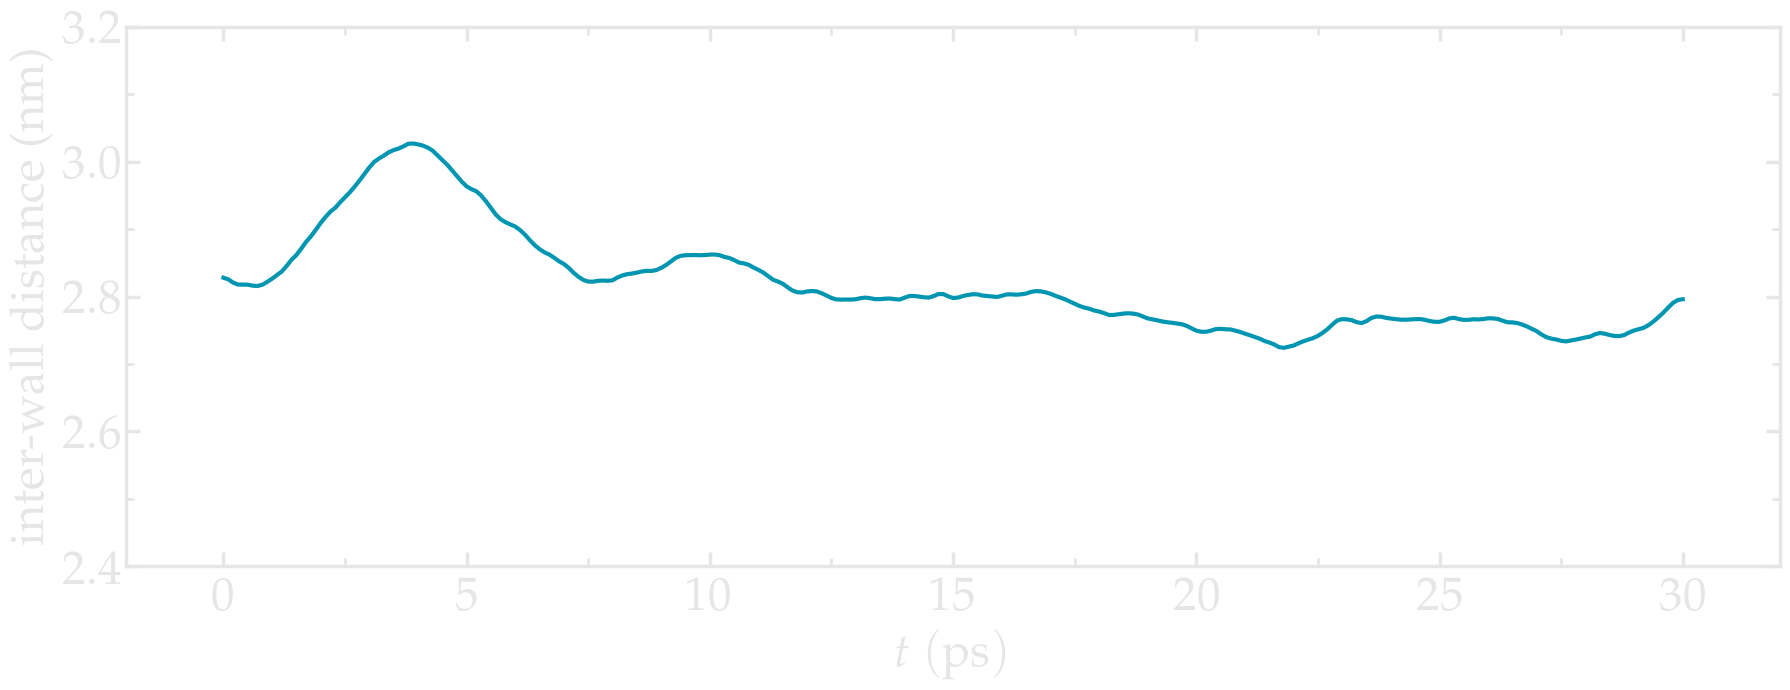

In [21]:
filename = "equilibration"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time, distance, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$', r'inter-wall distance (nm)',
                    legend=False, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(0, 35, 5), x_boundaries=(-2, 32),
                   y_ticks=np.arange(2.4, 3.21, 0.2), y_boundaries=(2.4, 3.2))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

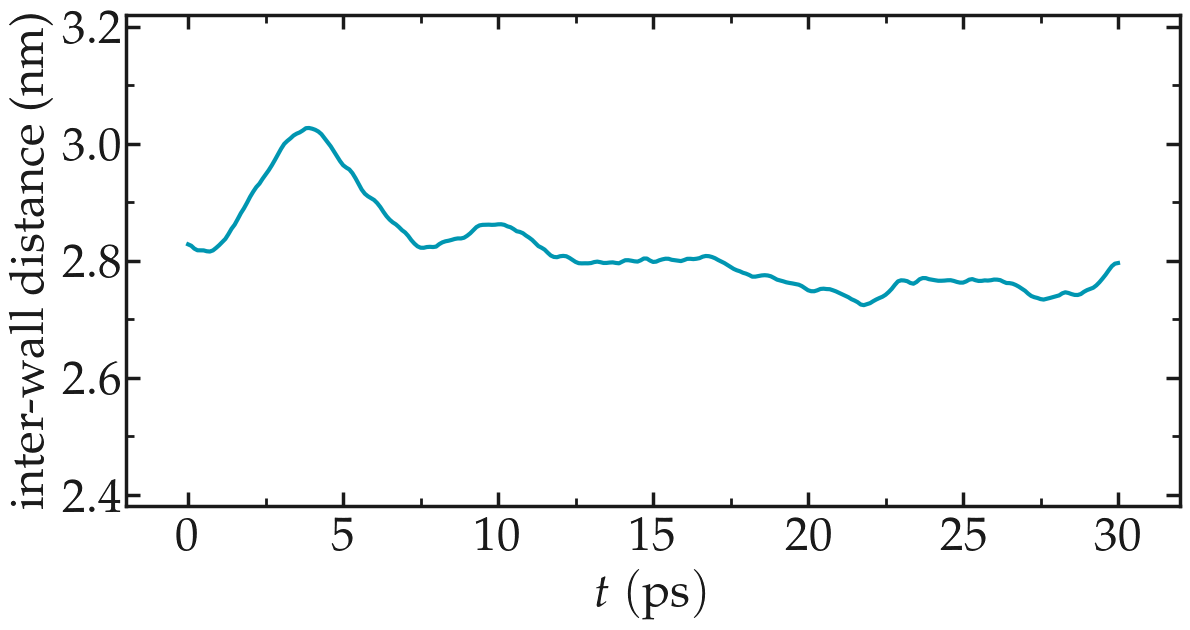

In [22]:
filename = "equilibration-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,6.4))
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(time, distance, color=colors["myblue"], linewidth=3)
complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$', r'inter-wall distance (nm)',
                legend=False, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(0, 35, 5), x_boundaries=(-2, 32),
                y_ticks=np.arange(2.4, 3.21, 0.2), y_boundaries=(2.38, 3.22))
#add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)